## Diabetes Health Indicators Classification (v1)

Dataset Source: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

##### Import Necessary Libraries

In [0]:
import pyspark

import matplotlib.pyplot as plt

import pyspark.sql.functions as F
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier, DecisionTreeClassifier, NaiveBayes

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Data Preprocessing

##### Ingest Dataset & Start Preprocessing it

In [0]:
# File location and type
file_location = "/FileStore/tables/diabetes.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

schema = StructType([
    StructField("pregnancies", IntegerType(), True),
    StructField("glucose", IntegerType(), True),
    StructField("blood_pressure", IntegerType(), True),
    StructField("skin_thickness", IntegerType(), True),
    StructField("insulin", IntegerType(), True),
    StructField("bmi", FloatType(), True),
    StructField("diabetes_pedigree_function", FloatType(), True),
    StructField("age", IntegerType(), True),
    StructField("outcome", IntegerType(), True),
])

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .schema(schema)\
  .load(file_location)

df = df.dropna()

df = df.dropDuplicates()

display(df)

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
7,106,92,18,0,22.7,0.235,48,0
9,123,70,44,94,33.1,0.374,40,0
3,121,52,0,0,36.0,0.127,25,1
4,95,60,32,0,35.4,0.284,28,0
2,108,62,32,56,25.2,0.128,21,0
4,131,68,21,166,33.1,0.16,28,0
10,115,0,0,0,35.3,0.134,29,0
8,85,55,20,0,24.4,0.136,42,0
0,94,0,0,0,0.0,0.256,25,0
2,108,64,0,0,30.8,0.158,21,0


Output can only be rendered in Databricks

##### Display Summary Information About Dataset

In [0]:
df.summary().show()

+-------+------------------+----------------+------------------+------------------+------------------+-----------------+--------------------------+------------------+-------------------+
|summary|       pregnancies|         glucose|    blood_pressure|    skin_thickness|           insulin|              bmi|diabetes_pedigree_function|               age|            outcome|
+-------+------------------+----------------+------------------+------------------+------------------+-----------------+--------------------------+------------------+-------------------+
|  count|               768|             768|               768|               768|               768|              768|                       768|               768|                768|
|   mean|3.8450520833333335|    120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.99257813890775|        0.4718763029280429|33.240885416666664| 0.3489583333333333|
| stddev| 3.369578062698869|31.9726181951362|19.355807170644777|1

##### Display Unique Values in Label (outcome)

In [0]:
df.select("outcome").distinct().show()

+-------+
|outcome|
+-------+
|      1|
|      0|
+-------+



##### What Kind of Data Are We Working With?

In [0]:
# String Value Columns
categorical_columns = [item[0] for item in df.dtypes if item[1].startswith("string")]
print(f"Categorical (String) Columns ({len(categorical_columns)}):")
for x in categorical_columns: print(x)

# Integer Columns
int_columns = [item[0] for item in df.dtypes if item[1].startswith("int")]
print(f"\nInteger Columns ({len(int_columns)}):")
for x in int_columns: print(x, end=", ")

# Floating Point Columns
fp_columns = [item[0] for item in df.dtypes if item[1].startswith("float")]
print(f"\n\nFloating Point Columns ({len(fp_columns)}):")
for x in fp_columns: print(x, end=", ")

Categorical (String) Columns (0):

Integer Columns (7):
pregnancies, glucose, blood_pressure, skin_thickness, insulin, age, outcome, 

Floating Point Columns (2):
bmi, diabetes_pedigree_function, 

##### Function to Remove Class (outcome) Imbalance

In [0]:
def balance_dataset(dataset, unique_label_values, new_schema, samples = 20000, label_col = "label"):
    temp_df =  spark.createDataFrame([], new_schema)
    new_df =  spark.createDataFrame([], new_schema)
    
    for ulab in unique_label_values:
        # extract df of only the desired labels
        temp_df = dataset.where(F.col(label_col).isin(ulab))
        
        ratio = round(samples/temp_df.count(), 4)
        # sample it to desired number of samples
        if ratio > 1.0:
            # Oversample
            temp_df = temp_df.sample(True, ratio, seed=42)
        elif ratio < 1.0:
            # Undersample
            temp_df = temp_df.sample(False, ratio, seed=42)
        elif ratio == 1.0:
            # Just use the existing dataframe
            pass
        # concatenate it to the new_df
        new_df = new_df.union(temp_df)
        # unpersist the temp_df
        temp_df.unpersist()
    return new_df

##### Define Necessary Inputs & Remove Class (outcome) Imbalance

In [0]:
new_schema = StructType([
    StructField("pregnancies", IntegerType(), True),
    StructField("glucose", IntegerType(), True),
    StructField("blood_pressure", IntegerType(), True),
    StructField("skin_thickness", IntegerType(), True),
    StructField("insulin", IntegerType(), True),
    StructField("bmi", FloatType(), True),
    StructField("diabetes_pedigree_function", FloatType(), True),
    StructField("age", IntegerType(), True),
    StructField("outcome", IntegerType(), True),
         ])

unique_label_vals = [0, 1]

bal_ds = balance_dataset(df, unique_label_vals, new_schema, 500, "outcome")

display(bal_ds)

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
7,106,92,18,0,22.7,0.235,48,0
9,123,70,44,94,33.1,0.374,40,0
4,95,60,32,0,35.4,0.284,28,0
2,108,62,32,56,25.2,0.128,21,0
4,131,68,21,166,33.1,0.16,28,0
10,115,0,0,0,35.3,0.134,29,0
8,85,55,20,0,24.4,0.136,42,0
0,94,0,0,0,0.0,0.256,25,0
2,108,64,0,0,30.8,0.158,21,0
2,90,80,14,55,24.4,0.249,24,0


Output can only be rendered in Databricks

### Models

##### Define Metrics Evaluation Function

In [0]:
def metrics_eval(prediction, label, model_name):
    
    print("-------------------------------------------------------------")
    print(f"The {model_name} Model:")
    print("-------------------------------------------------------------")
    print(f"Classification Report for the {model_name} Model:")
    #preds = predictions.select('label', 'rawPrediction', 'prediction', 'probability')
    #preds_in_pandas = (preds.select(F.col('label').alias("ground_truth"), F.col('prediction').alias("prediction"))).toPandas()
    
    report = classification_report(label, prediction)
    print(report)
    print("-------------------------------------------------------------")
    
    print(f"Confusion Matrix for the {model_name} Model:")
    cm = confusion_matrix(label, prediction)
    dist = ConfusionMatrixDisplay(confusion_matrix=cm)
    dist.plot()
    
    print("-------------------------------------------------------------")

#### All Models Except Logistic Regression

##### Create Pipeline Stages

In [0]:
numerical_features = [c for c in bal_ds.columns if c not in ("outcome")]

stages = []

label_string_idx = StringIndexer(inputCol = "outcome", outputCol = "label")
stages += [label_string_idx]

numerical_features
assembler = VectorAssembler(inputCols=numerical_features, outputCol="features")
stages += [assembler]

##### Run Dataset Through Pipeline

In [0]:
cols = df.columns

diabetes_pipeline = Pipeline(stages = stages)
diabetes_model = diabetes_pipeline.fit(bal_ds)
prepped_ds = diabetes_model.transform(bal_ds)

selectedCols = ["label", "features"] + cols
prepped_ds = prepped_ds.select(selectedCols)

##### Split Dataset into Training & Testing Datasets

In [0]:
train_ds, test_ds = prepped_ds.randomSplit(weights=[0.80, 0.20], seed=42)

print(f"# of Samples in Training Dataset: {train_ds.count()}")
print(f"# of Samples in Testing Dataset: {test_ds.count()}")

# of Samples in Training Dataset: 814
# of Samples in Testing Dataset: 183


##### Decision Tree Classifier

-------------------------------------------------------------
The Decision Tree Classifier Model:
-------------------------------------------------------------
Classification Report for the Decision Tree Classifier Model:
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86        97
         1.0       0.83      0.86      0.85        86

    accuracy                           0.85       183
   macro avg       0.85      0.85      0.85       183
weighted avg       0.85      0.85      0.85       183

-------------------------------------------------------------
Confusion Matrix for the Decision Tree Classifier Model:
-------------------------------------------------------------


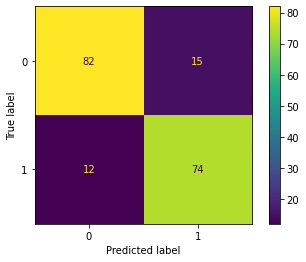

In [0]:
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label')

dt_model = dt.fit(train_ds)

dr_preds = dt_model.transform(test_ds)

dt_preds_in_pandas = dr_preds.select('label', 'prediction').toPandas()
metrics_eval(dt_preds_in_pandas['label'], dt_preds_in_pandas['prediction'], "Decision Tree Classifier")

##### Random Forest Classifier

-------------------------------------------------------------
The Random Forest Classifier Model:
-------------------------------------------------------------
Classification Report for the Random Forest Classifier Model:
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        94
         1.0       0.84      0.84      0.84        89

    accuracy                           0.85       183
   macro avg       0.85      0.85      0.85       183
weighted avg       0.85      0.85      0.85       183

-------------------------------------------------------------
Confusion Matrix for the Random Forest Classifier Model:
-------------------------------------------------------------


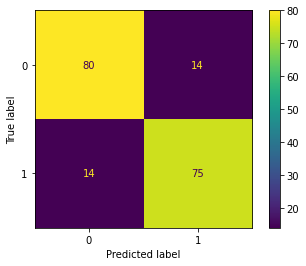

In [0]:
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label', numTrees=10)

rf_model = rf.fit(train_ds)

rf_preds = rf_model.transform(test_ds)

rf_preds_in_pandas = rf_preds.select('label', 'prediction').toPandas()
metrics_eval(rf_preds_in_pandas['label'], rf_preds_in_pandas['prediction'], "Random Forest Classifier")

##### Gradient-Boosted Tree Classifier

-------------------------------------------------------------
The Gradient-Boosted Tree Classifier Model:
-------------------------------------------------------------
Classification Report for the Gradient-Boosted Tree Classifier Model:
              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90        95
         1.0       0.89      0.90      0.89        88

    accuracy                           0.90       183
   macro avg       0.90      0.90      0.90       183
weighted avg       0.90      0.90      0.90       183

-------------------------------------------------------------
Confusion Matrix for the Gradient-Boosted Tree Classifier Model:
-------------------------------------------------------------


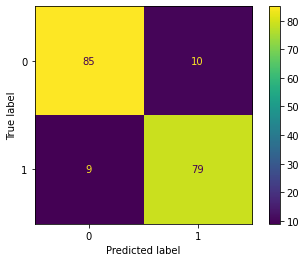

In [0]:
gbt = GBTClassifier(featuresCol = 'features', labelCol = 'label', maxIter=10)

gbt_model = gbt.fit(train_ds)

gbt_preds = gbt_model.transform(test_ds)

gbt_preds_in_pandas = gbt_preds.select('label', 'prediction').toPandas()
metrics_eval(gbt_preds_in_pandas['label'], gbt_preds_in_pandas['prediction'], "Gradient-Boosted Tree Classifier")

##### Naive Bayes Classifier

-------------------------------------------------------------
The Naive Bayes Classifier Model:
-------------------------------------------------------------
Classification Report for the Naive Bayes Classifier Model:
              precision    recall  f1-score   support

         0.0       0.67      0.64      0.65        99
         1.0       0.60      0.63      0.61        84

    accuracy                           0.63       183
   macro avg       0.63      0.63      0.63       183
weighted avg       0.64      0.63      0.63       183

-------------------------------------------------------------
Confusion Matrix for the Naive Bayes Classifier Model:
-------------------------------------------------------------


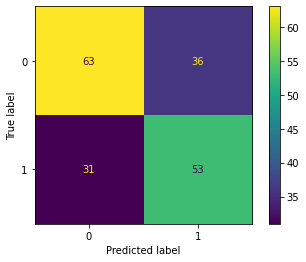

In [0]:
nb = NaiveBayes(smoothing=1.0)

nb_model = nb.fit(train_ds)

nb_preds = nb_model.transform(test_ds)

nb_preds_in_pandas = nb_preds.select('label', 'prediction').toPandas()
metrics_eval(nb_preds_in_pandas['label'], nb_preds_in_pandas['prediction'], "Naive Bayes Classifier")

#### Logistic Regression

##### Create Pipeline Stages

In [0]:
numerical_features = [c for c in bal_ds.columns if c not in ("outcome")]

lr_stages = []

label_string_idx = StringIndexer(inputCol = "outcome", outputCol = "label")
lr_stages += [label_string_idx]

numerical_features
assembler = VectorAssembler(inputCols=numerical_features, outputCol="features")
lr_stages += [assembler]

scaler = StandardScaler(inputCol="features", outputCol="features_scaled",
                        withStd=True, withMean=False)

lr_stages += [scaler]

##### Run Dataset Through Pipeline

In [0]:
cols = df.columns

lr_pipe = Pipeline(stages = lr_stages)
mobile_phone_model = lr_pipe.fit(bal_ds)
lr_prepped_ds = mobile_phone_model.transform(bal_ds)

selectedCols = ["label", "features_scaled"] + cols
prepped_ds = lr_prepped_ds.select(selectedCols)

##### Split Dataset into Training & Testing Datasets

In [0]:
train_ds, test_ds = lr_prepped_ds.randomSplit(weights=[0.80, 0.20], seed=42)

print(f"# of Samples in Training Dataset: {train_ds.count()}")
print(f"# of Samples in Testing Dataset: {test_ds.count()}")

# of Samples in Training Dataset: 814
# of Samples in Testing Dataset: 183


##### Run Logistic Regression Model & Evaluation Results

-------------------------------------------------------------
The Logistic Regression Model:
-------------------------------------------------------------
Classification Report for the Logistic Regression Model:
              precision    recall  f1-score   support

         0.0       0.68      0.70      0.69        91
         1.0       0.70      0.67      0.69        92

    accuracy                           0.69       183
   macro avg       0.69      0.69      0.69       183
weighted avg       0.69      0.69      0.69       183

-------------------------------------------------------------
Confusion Matrix for the Logistic Regression Model:
-------------------------------------------------------------


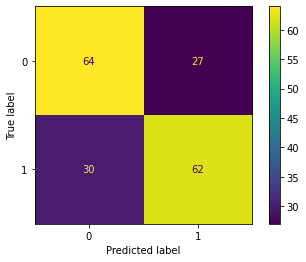

In [0]:
lr = LogisticRegression(maxIter=10, featuresCol = 'features_scaled', labelCol = 'label')

# Fit the model
lr_model = lr.fit(train_ds)

# predictions
lr_preds = lr_model.transform(test_ds)

lr_preds_in_pandas = lr_preds.select('label', 'prediction').toPandas()
metrics_eval(lr_preds_in_pandas['label'], lr_preds_in_pandas['prediction'], "Logistic Regression")

## Notes & Other Takeaways From This Project
****
- The results do not surprise me. The Gradient-Boosted Tree Model performed the best of all algorithms.
****
- I decided to oversample the minority class for this project due to the limited number of samples in the dataset.
****
- The next step is to try different scalers for the logistic regression model to see which scaler works best with it. That will involve creating a loop to work through the different scalers as well as wrappiing much of the functionality (at least for the logistic regression model) in functions.
****
- Another idea to improve this model is to utilize Cross Validation.
****